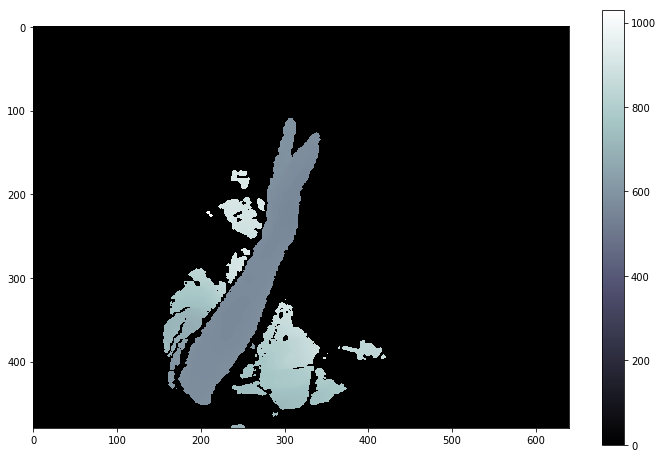

In [2]:
import numpy as np
from skimage import io as skimio
import matplotlib.pyplot as mpplot
mpplot.rcParams['figure.figsize'] = (12,8)

fig, ax = mpplot.subplots()
img = skimio.imread('image_D00000030.png')
mpplot.imshow(img, cmap='bone')
mpplot.colorbar()
mpplot.show()

In [3]:
import nibabel as nib
from nilearn import plotting

nibi = nib.Nifti2Image(img, affine=np.eye(4))
plotting.plot_img(nibi)

/home/xwu/anaconda2/envs/tf2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 2D image. See http://nilearn.github.io/manipulating_images/input_output.html.

/home/xwu/anaconda2/envs/tf2/lib/python2.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


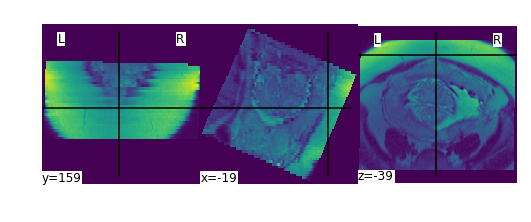

In [6]:
plotting.plot_img('img3d.nii')

In [11]:
def remove_keymap_conflicts(new_keys_set):
    for prop in mpplot.rcParams:
        if prop.startswith('keymap.'):
            keys = mpplot.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = mpplot.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

runtime(s) of fast marching 0.0345339775085
runtime(s) of raster  scan  0.0335490703583


/home/xwu/anaconda2/envs/tf2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  
/home/xwu/anaconda2/envs/tf2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  
/home/xwu/anaconda2/envs/tf2/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  app.launch_new_instance()
/home/xwu/anaconda2/envs/tf2/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  app.launch_new_instance()


<IPython.core.display.Javascript object>


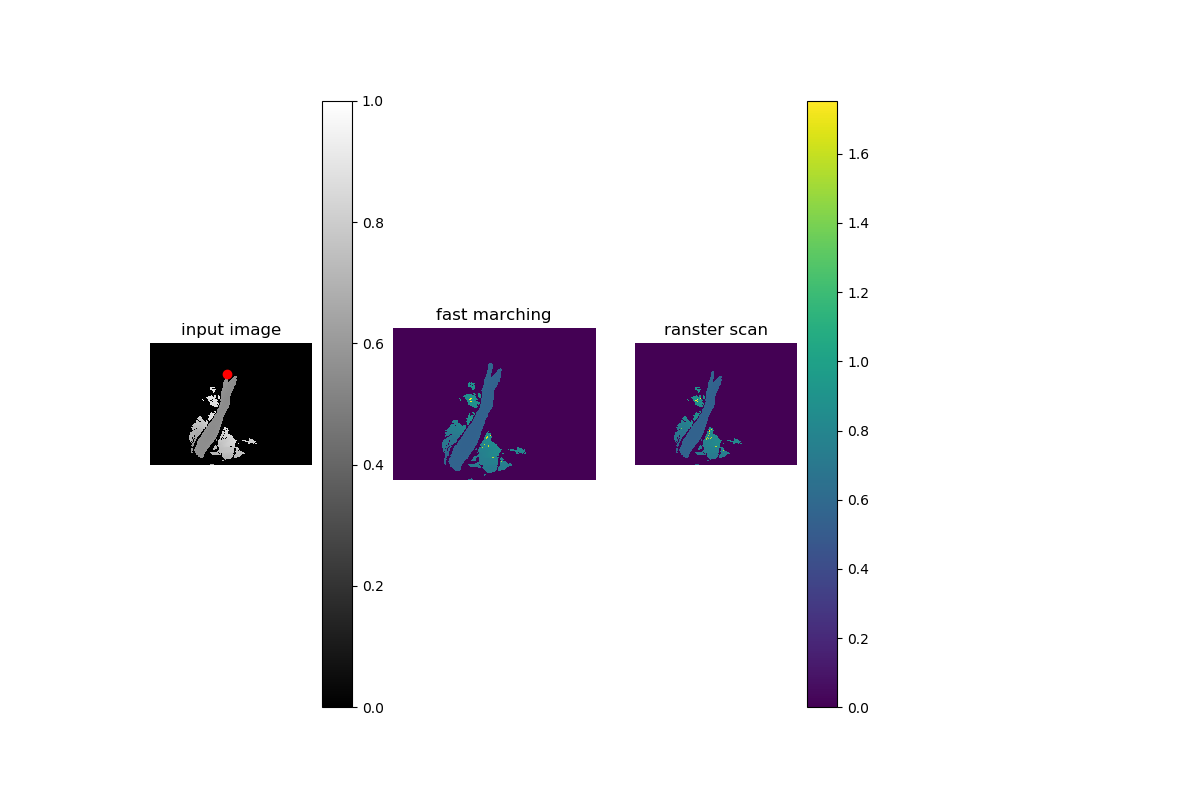

In [44]:
from PIL import Image
import time
import geodesic_distance

#I = np.asarray(Image.open('image_D00000030.png').convert('L'), np.float32)
I = img.astype(np.float32)
I /= 2000
I[1 < I] = 1
I = I / np.max(I) * 1
S = np.zeros_like(I, np.uint8)
S[305][120] = 1
t0 = time.time()
#D1 = geodesic_distance.geodesic2d_fast_marching(I,S)
D2 = geodesic_distance.geodesic2d_raster_scan(I,S)
t1 = time.time()
D2 = geodesic_distance.geodesic2d_raster_scan(I,S)
dt1 = t1 - t0
dt2 = time.time() - t1
print "runtime(s) of fast marching {0:}".format(dt1)
print "runtime(s) of raster  scan  {0:}".format(dt2)
mpplot.subplot(1,4,1); mpplot.imshow(I, cmap='gray')
mpplot.autoscale(False);  mpplot.plot([305], [120], 'ro')
mpplot.colorbar()
mpplot.axis('off'); mpplot.title('input image')

mpplot.subplot(1,4,2); mpplot.imshow(D1)
mpplot.axis('off'); mpplot.title('fast marching')

mpplot.subplot(1,4,3); mpplot.imshow(D2)
mpplot.axis('off'); mpplot.title('ranster scan')
#mpplot.show()

#mpplot.subplot(1,4,4); mpplot.contour(D2)
#mpplot.axis('off'); mpplot.title('ranster scan')
mpplot.colorbar()
mpplot.show()

In [25]:
%matplotlib notebook
struct = nib.load('img3d.nii')
struct_arr = struct.get_data().T
#multi_slice_viewer(struct_arr)